## Abstract

The research study focuses on the performance of students and examines the relationship of economic, personal and social attributes of the students through descriptive statistics. Using data collected from 1000 students on their performance on 3 subjects. It was found that the average student’s performance on the 3 subjects were within close range (66.1 - 69.2). Further analysis of the subject with respect to other variables like gender, race/ethnicity and test preparations show that the level of parental education has an effect on the students ability ot complete necessary courses required for their tests which lead to better score. Females do better in reading and writing while males do better at maths, irrespective of the race/ethinicty or level of preparation  

## Introduction 


The collected data would be prepared and analysed to give insight on the overall students performance through descriptive statistics. Univariate analysis would be carried out on the 3 quantitative variables with their respective distribution graphs. Multivariate analysis would be carried out to determine how the various categorical data relates to the recorded  scores.

## Data Set Preparation

The data Set contains 1000 rows and 8 columns. The data is oragnized but the headers would be edited to remove special characters and whitespace.There are 3 sets of quantitative variables and 5 sets of qualitative variables. 
The required python libraries are run in order to use their functions and methods for the Univariate Analysis and while Ms.Excel would be used to conduct the Multivariate Analysis 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Univariate Analysis

Univariate analayis would describe the distribution of all the quanititative varaibles.Numerical & Graphical  summaries for the 3 qualitiative groups are displayed below 

In [6]:
da =pd.read_csv("StudentsPerformance.csv")
da.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


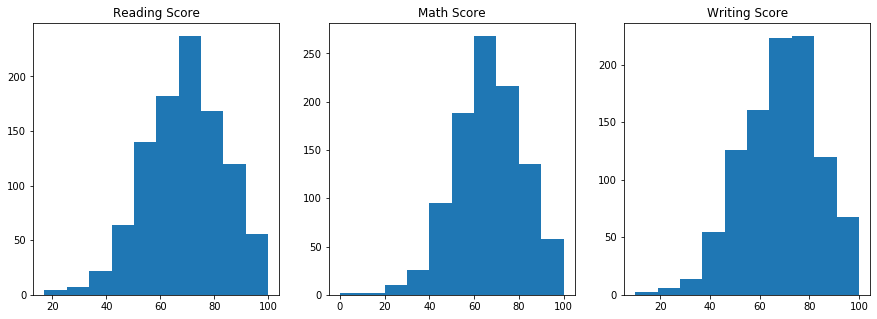

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(x = da["reading score"])
plt.title("Reading Score")

plt.subplot(1,3,2)
plt.hist(x = da["math score"])
plt.title("Math Score")

plt.subplot(1,3,3)
plt.hist(x = da["writing score"])
plt.title("Writing Score")

plt.show()


The graphical summary above shows that the Math, Reading and Writing Scores are left-skewed. The collected scores all have similar interquartile range and mean which means that the average scores obtained accross the 3 subjects are close in range (66.1-69.2). The mean is affected when the distribution is skewed to the left,while the median is affected slightly or not at all. This situation is also called negative skewness

## Multivariate Analysis 


This analysis would focus on examining the relationships between the qualitative and quantitative data variables. For example how does the taking a test preparation course affect the scores in each subject. What subjects do females do better than males andd vice versa. Questions that examine the data would be answered by conducting the necessary multivariate analysis.
Females make up 51.80% of the scores in the data set and the males 48.20% of  the scores recorded.

In [32]:
gender_scores = da[["reading score","writing score","math score"]].groupby(da["gender"]).mean()
print(gender_scores)

        reading score  writing score  math score
gender                                          
female      72.608108      72.467181   63.633205
male        65.473029      63.311203   68.728216


In [37]:
da["average_score"] = (da["reading score"]+da["writing score"]+da["math score"])/3
da.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


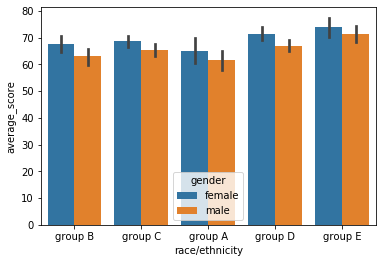

In [71]:
sns.barplot(x="race/ethnicity", y="average_score", hue="gender", data=da)

We can infer that group E students record the highest average scores and Females do better on an average in reading and writing and Males do better in math regardless of the ethnicity. A larger number of students did not complete the test preparatory course but the females recorded a higher number of students who completed the course which could be a reason for their higher scores in reading and writing.

In [57]:
"""        
Create a dictionary that stores the mapping between grades and the scores.
Then you define a function grade_match(), which takes an argument score. 
You loop over the items in grades, comparing value to the key from the dictionary. 
"""

grades = {
    85: "A1",
    70: "B2",
    65: "B3",
    60: "C4",
    55: "C5",
    50: "C6",
    45: "D7",
    40: "E8",
    0: "F9",
}

def grade_match(score):
    for key, letter in grades.items():
        if score >= key:
            return letter

"""
Create new variable called average_scores_cat.
To create the categorical column, you pass the letter grades as well as two keyword arguments:
categories is passed the values from grades. The values in grades are the possible weac grades.
The categorical column that has beeen created is assigned to a new column in da called Average_score_cat.
"""

waec_grades = da["average_score"].map(grade_match)
da["average_score_cat"] = pd.Categorical(
    waec_grades, categories=grades.values(), ordered=True)

da.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,average_score_cat
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B2
1,female,group C,some college,standard,completed,69,90,88,82.333333,B2
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,D7
4,male,group C,some college,standard,none,76,78,75,76.333333,B2


In [34]:
Plevel_edu_scores = da[["reading score","writing score","math score"]].groupby(da["parental level of education"]).mean()
print(Plevel_edu_scores)

                             reading score  writing score  math score
parental level of education                                          
associate's degree               70.927928      69.896396   67.882883
bachelor's degree                73.000000      73.381356   69.389831
high school                      64.704082      62.448980   62.137755
master's degree                  75.372881      75.677966   69.745763
some college                     69.460177      68.840708   67.128319
some high school                 66.938547      64.888268   63.497207


Students whose parents level of education is up to a master’s degree have the highest average scores across all 3 subjects and the highest number of students who completed the test preparation, the next set of high averages are recorded by students with parents who have bachelor’s degree.

In [62]:
mix_scores = da.groupby(["parental level of education","test preparation course"])["reading score","writing score","math score"].mean()
print(mix_scores.to_string(float_format="%.3f"))

                                                     reading score  writing score  math score
parental level of education test preparation course                                          
associate's degree          completed                       76.171         76.817      71.829
                            none                            67.857         65.843      65.571
bachelor's degree           completed                       76.739         78.696      73.283
                            none                            70.611         69.986      66.903
high school                 completed                       67.839         68.054      65.000
                            none                            63.450         60.207      60.993
master's degree             completed                       78.250         80.100      70.600
                            none                            73.897         73.410      69.308
some college                completed                       

Parents on all level of education were able to record a high number of standard meals provided than free/reduced meals.

## Conclusion

The objective of this report is to gain first intuition on student performance through descriptive statistics on economic, personal and social attributes.In the report, the analyis revealed that the average performannce in the 3 subjects is above 65%. Females do better in reading and writing because the have a higher proportion of students that complete  the test preparatory course. The level of education of the student's parents also influence the amount of students who took the preparatoy test course. Finally, Group E has the students with the highest average scores because they contain the highest percentage of Parents with a masters degree.

In my opinion the variable Parent's level of education could be a determinng factor for the students completing the test preparatoy course and therefore doing better at the test. Also there is an external factor that would explain the reason for females doing better in reading and writing and males in maths.